In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
train = pd.read_csv('Iris.csv')

In [15]:
train.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

In [11]:
train.shape

(150, 6)

In [12]:
train.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No NULL values

In [16]:
train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [18]:
train.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<AxesSubplot:>

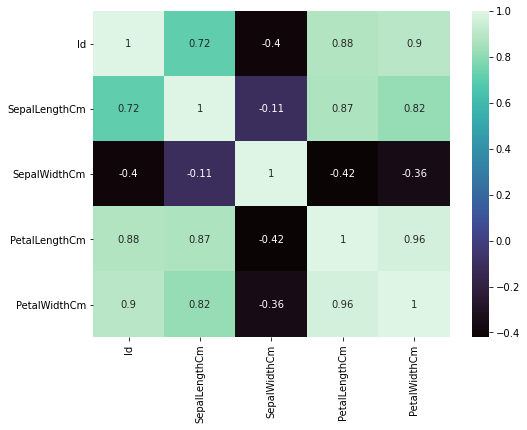

In [29]:
plt.figure(figsize = (8,6))
sns.heatmap(data = train.corr(), annot = True, cmap = 'mako')

petal width and petal length are highly correlated. same with petal length and sepal length. perhaps, petal length may be dropped. sepal width shows negative corr with others, it must be important in classification.

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

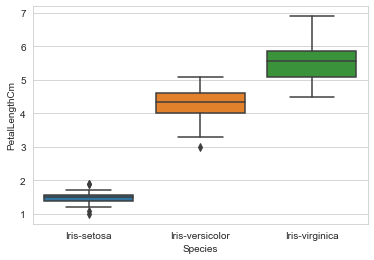

In [41]:
sns.set_style('whitegrid')
sns.boxplot(x="Species", y="PetalLengthCm", data=train)

In [31]:
train.drop('Id', axis = 1, inplace = True)

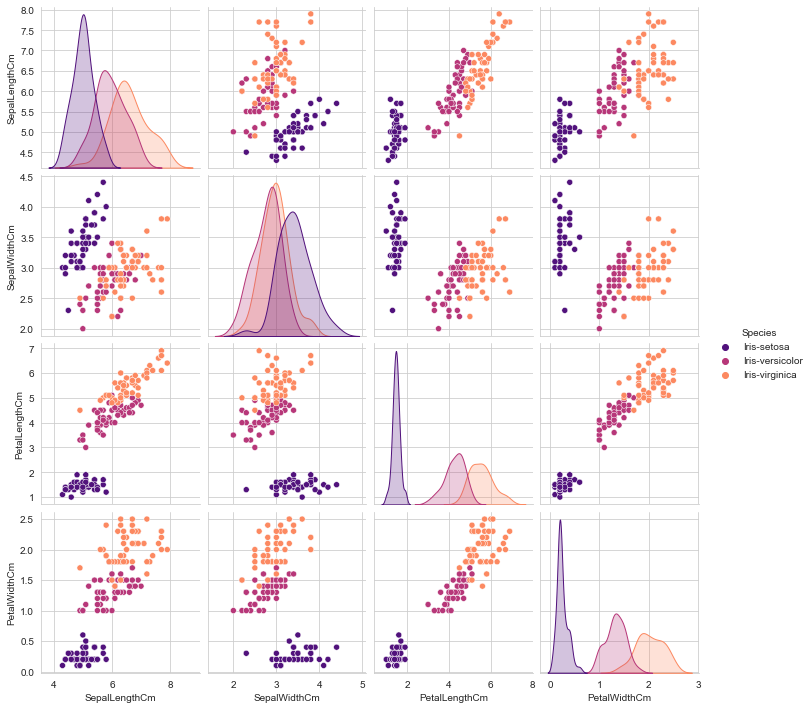

In [39]:
sns.set_style('whitegrid')
sns.pairplot(train, hue = 'Species', palette = 'magma')

<AxesSubplot:xlabel='Species', ylabel='count'>

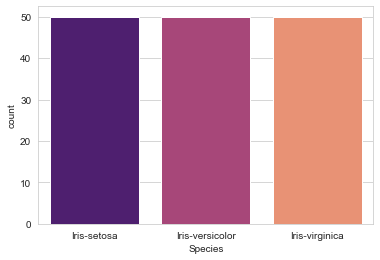

In [44]:
sns.countplot(x = 'Species', data = train, palette = 'magma')

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

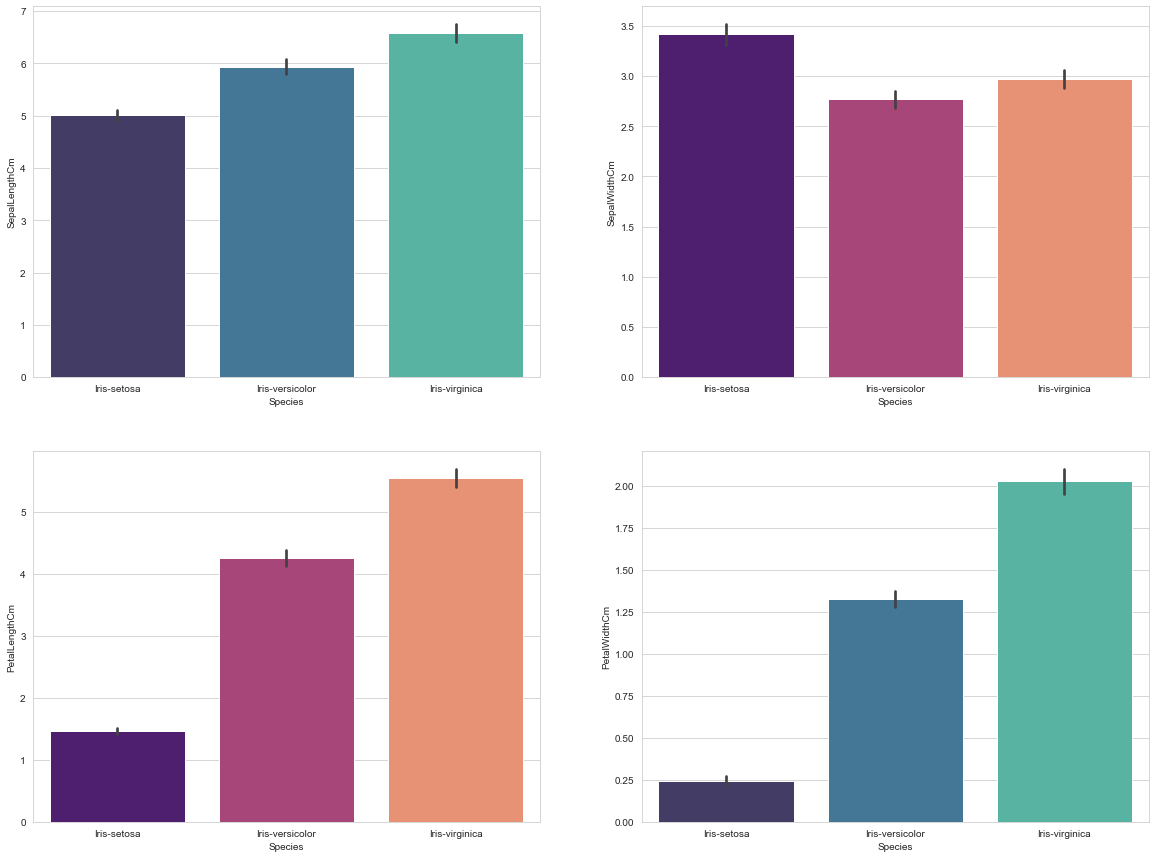

In [49]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.barplot(x = 'Species', y = 'SepalLengthCm', data = train, palette="mako")
plt.subplot(2,2,2)
sns.barplot(x = 'Species', y = 'SepalWidthCm', data = train, palette="magma")
plt.subplot(2,2,3)
sns.barplot(x = 'Species', y = 'PetalLengthCm', data = train, palette="magma")
plt.subplot(2,2,4)
sns.barplot(x = 'Species', y = 'PetalWidthCm', data = train, palette="mako")

# Standardisation 

In [50]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [52]:
scalar.fit(train.drop('Species',axis=1))

StandardScaler()

In [53]:
scaled_features = scalar.transform(train.drop('Species',axis=1))

In [54]:
train1 = pd.DataFrame(scaled_features,columns=train.columns[:-1])
train1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


# Train test Split

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,train['Species'],
                                                    test_size=0.30)

# Using KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

first, we need ot select the value of k to get the best results, we will use the "elbow method"

In [58]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

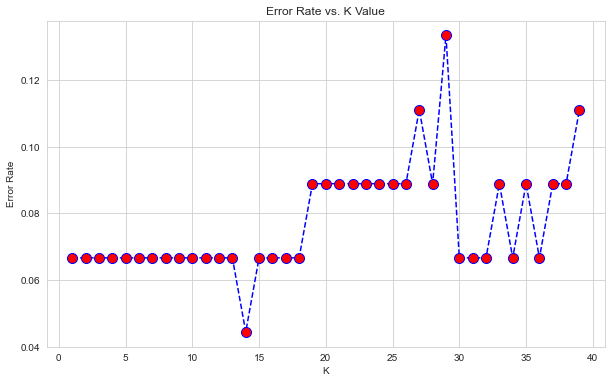

In [59]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

from the graph above, 14 seems like a good value to use

In [60]:
knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
print('WITH K=14')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=14


[[17  0  0]
 [ 0 18  1]
 [ 0  1  8]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.95      0.95      0.95        19
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



So, from the classification method we can see that we get 96% accuracy from our model. this concludes the EDA and model (training, prediction).